<a href="https://colab.research.google.com/github/jhonlarico/jhonlarico/blob/main/Part(A).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image dimensions: (1200, 1600, 3)
Image dimensions: (1200, 1600, 3)
Image dimensions: (1200, 1600, 3)


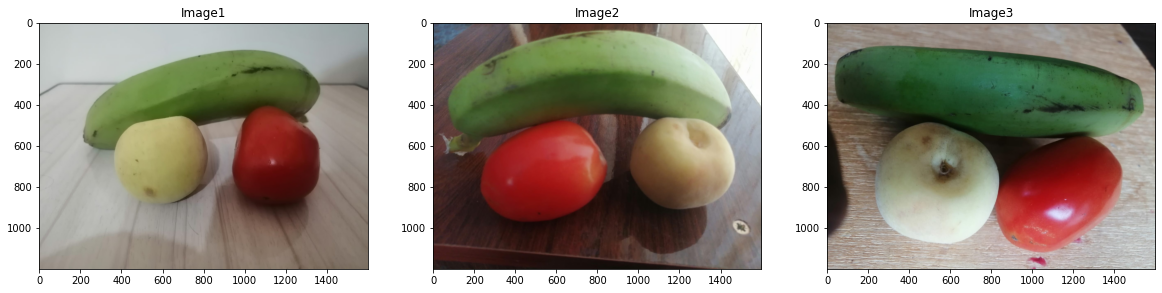

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files as FILE
import os, requests
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline
#Read Image
img = cv2.imread('onefruts.jpeg')
img1 = cv2.imread('twofruts.jpeg')
img2 = cv2.imread('threefruts.jpeg')
#adding color to the image
one = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
two = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
three = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#sample color images
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('Image1')
ax1.imshow(one, cmap='gray')
ax2.set_title('Image2')
ax2.imshow(two, cmap='gray')
ax3.set_title('Image3')
ax3.imshow(three, cmap='gray')
#printing dimensions
print('Image dimensions:', one.shape)
print('Image dimensions:', two.shape)
print('Image dimensions:', three.shape)

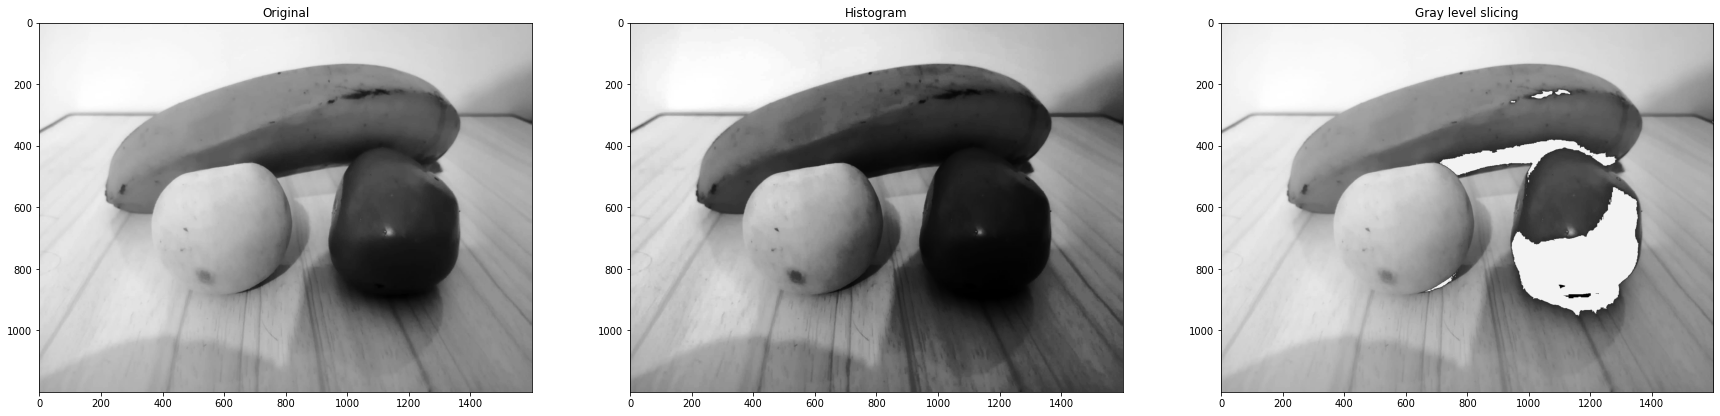

In [4]:
#gray image reading
img = cv2.imread('onefruts.jpeg',0)
img1 = cv2.imread('twofruts.jpeg',0)
img2 = cv2.imread('threefruts.jpeg',0)
#############################################################################################3
#Gray level slicing
m,n=img.shape
T1 = 20
T2 = 50
imagen= np.zeros((m,n), dtype = int)
for i in range(m):
    for j in range(n):
        if T1 < img[i,j] < T2: 
            imagen[i,j]= 200
        else:
            imagen[i,j] = img[i,j]
###########################################################################################
#Contrast stretching
valmin=1
valmax=170
xp=(np.clip(img1,valmin,valmax)-valmin)/(valmax-valmin)
xf=np.intc(xp*255)
#############################################################################################
#Clahe
clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(16,16))
cl1 = clahe.apply(img2)
###########################################################################################
# Gets an equalized image
equ = cv2.equalizeHist(img)
equ1 = cv2.equalizeHist(img1)
equ2 = cv2.equalizeHist(img2)
#Sample of images
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,20))
ax1.set_title('Original')
ax1.imshow(img, cmap='gray')
ax2.set_title('Histogram')
ax2.imshow(equ, cmap='gray')
ax3.set_title('Gray level slicing')
ax3.imshow(imagen, cmap='gray')

# ***Gray level slicing***
In the image with the Gray level slicing filter, you can see a clearer image but with some flaws that make us lose information from the image and although it shows us a good result due to the loss of information, the histogram filter is the one that should be used. take into consideration.

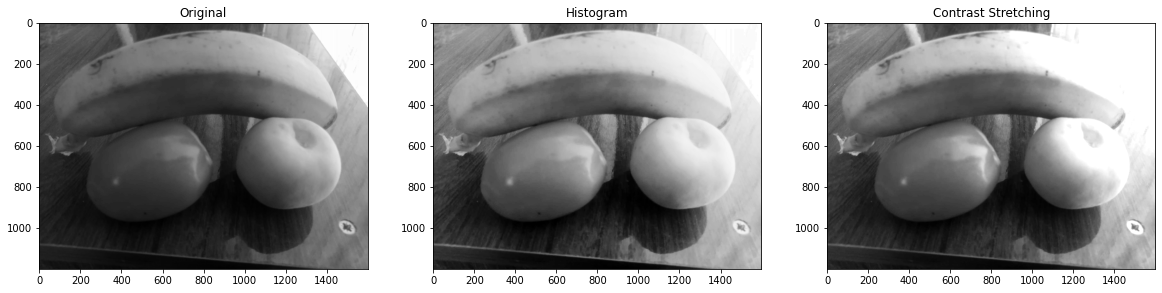

In [5]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('Original')
ax1.imshow(img1, cmap='gray')
ax2.set_title('Histogram')
ax2.imshow(equ1, cmap='gray')
ax3.set_title('Contrast Stretching')
ax3.imshow(xf, cmap='gray')

# ***Contrast stretching***
In the image with the Contrast stretching filter, you can notice a similar aspect to the image filtered by histrogram equalization, but with the difference that in the Contrast stretching filter there is a small loss of information in the part that the brightness of the sun and For that reason, the histogram filter would be taken as the best option to consider.

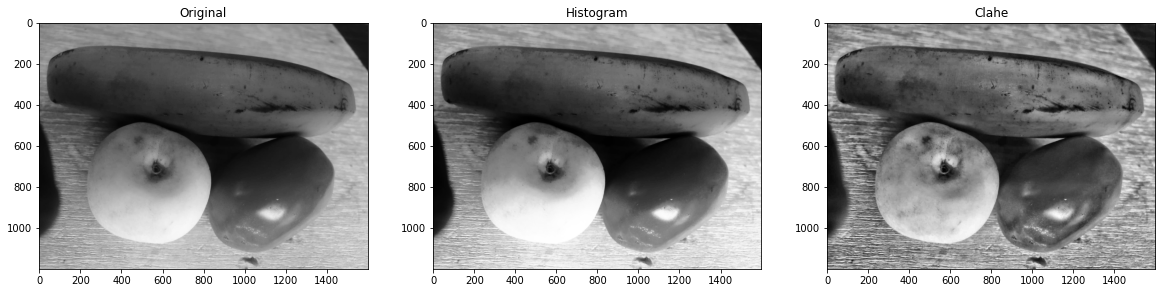

In [6]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('Original')
ax1.imshow(img2, cmap='gray')
ax2.set_title('Histogram')
ax2.imshow(equ2, cmap='gray')
ax3.set_title('Clahe')
ax3.imshow(cl1, cmap='gray')

# ***Clahe***
In the image with the Clahe filter, you can see some more defined tones due to the high contrast. This would be useful to observe edges, etc. However, in the histogram filter, a small difference is seen from the original image and therefore it would be defined that both filters should be taken into account

# **Obtaining Masks**

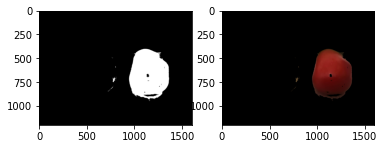

In [7]:
#@title Values ​​for a Light Red
light_red11 = 0 #@param {type:"slider", min:0, max:255, step:1}
light_red12 = 129 #@param {type:"slider", min:1, max:255, step:1}
light_red13 = 41 #@param {type:"slider", min:1, max:255, step:1}

#@title Values ​​for a Dark Red
dark_red21 = 18 #@param {type:"slider", min:1, max:255, step:1}
dark_red22 = 255 #@param {type:"slider", min:1, max:255, step:1}
dark_red23 = 255 #@param {type:"slider", min:1, max:255, step:1}

tomatoes = cv2.cvtColor(one, cv2.COLOR_RGB2HSV)
light_red = (light_red11, light_red12, light_red13)
dark_red = (dark_red21, dark_red22, dark_red23)
mask11 = cv2.inRange(tomatoes, light_red, dark_red)
result = cv2.bitwise_and(one, one, mask=mask11)
plt.subplot(1, 2, 1)
plt.imshow(mask11, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

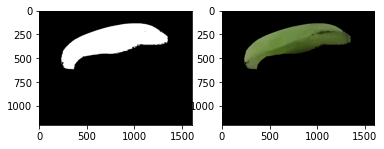

In [8]:
#@title Values ​​for a Light Green
light_green11 = 38 #@param {type:"slider", min:1, max:255, step:1}
light_green12 = 68 #@param {type:"slider", min:1, max:255, step:1}
light_green13 = 42 #@param {type:"slider", min:1, max:255, step:1}

#@title Values ​​for a Dark Green
dark_green21 = 57 #@param {type:"slider", min:1, max:255, step:1}
dark_green22 = 255 #@param {type:"slider", min:1, max:255, step:1}
dark_green23 = 255 #@param {type:"slider", min:1, max:255, step:1}

banana = cv2.cvtColor(one, cv2.COLOR_RGB2HSV)
light_green = (light_green11, light_green12, light_green13)
dark_green = (dark_green21, dark_green22, dark_green23)
mask12 = cv2.inRange(banana, light_green, dark_green)
result = cv2.bitwise_and(one, one, mask=mask12)
plt.subplot(1, 2, 1)
plt.imshow(mask12, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

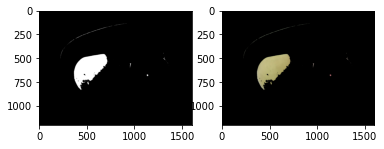

In [9]:
#@title Values ​​for a Light Yellow
light_yelow11 = 0 #@param {type:"slider", min:0, max:255, step:1}
light_yelow12 = 33 #@param {type:"slider", min:1, max:255, step:1}
light_yelow13 = 170 #@param {type:"slider", min:1, max:255, step:1}

#@title Values ​​for a Dark Yellow
dark_yelow21 = 255 #@param {type:"slider", min:1, max:255, step:1}
dark_yelow22 = 255 #@param {type:"slider", min:1, max:255, step:1}
dark_yelow23 = 255 #@param {type:"slider", min:1, max:255, step:1}

peach = cv2.cvtColor(one, cv2.COLOR_RGB2HSV)
light_yelow = (light_yelow11, light_yelow12, light_yelow13)
dark_yelow = (dark_yelow21, dark_yelow22, dark_yelow23)
mask13 = cv2.inRange(peach, light_yelow, dark_yelow)
result = cv2.bitwise_and(one, one, mask=mask13)
plt.subplot(1, 2, 1)
plt.imshow(mask13, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

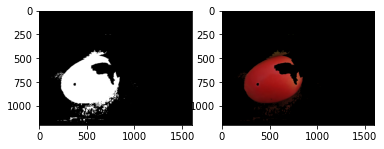

In [10]:
#@title Values ​​for a Light Red
light_red11 = 0 #@param {type:"slider", min:0, max:255, step:1}
light_red12 = 178 #@param {type:"slider", min:1, max:255, step:1}
light_red13 = 1 #@param {type:"slider", min:1, max:255, step:1}

#@title Values ​​for a Dark Red
dark_red21 = 255 #@param {type:"slider", min:1, max:255, step:1}
dark_red22 = 255 #@param {type:"slider", min:1, max:255, step:1}
dark_red23 = 255 #@param {type:"slider", min:1, max:255, step:1}

tomatoes = cv2.cvtColor(two, cv2.COLOR_RGB2HSV)
light_red = (light_red11, light_red12, light_red13)
dark_red = (dark_red21, dark_red22, dark_red23)
mask21 = cv2.inRange(tomatoes, light_red, dark_red)
result = cv2.bitwise_and(two, two, mask=mask21)
plt.subplot(1, 2, 1)
plt.imshow(mask21, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

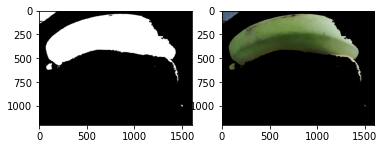

In [11]:
#@title Values ​​for a Light Green
light_green11 = 25 #@param {type:"slider", min:1, max:255, step:1}
light_green12 = 32 #@param {type:"slider", min:1, max:255, step:1}
light_green13 = 19 #@param {type:"slider", min:1, max:255, step:1}

#@title Values ​​for a Dark Green
dark_green21 = 132 #@param {type:"slider", min:1, max:255, step:1}
dark_green22 = 255 #@param {type:"slider", min:1, max:255, step:1}
dark_green23 = 255 #@param {type:"slider", min:1, max:255, step:1}

banana = cv2.cvtColor(two, cv2.COLOR_RGB2HSV)
light_green = (light_green11, light_green12, light_green13)
dark_green = (dark_green21, dark_green22, dark_green23)
mask22 = cv2.inRange(banana, light_green, dark_green)
result = cv2.bitwise_and(two, two, mask=mask22)
plt.subplot(1, 2, 1)
plt.imshow(mask22, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

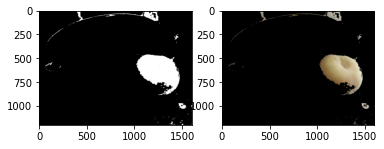

In [12]:
#@title Values ​​for a Light Yellow
light_yelow11 = 16 #@param {type:"slider", min:0, max:255, step:1}
light_yelow12 = 0 #@param {type:"slider", min:0, max:255, step:1}
light_yelow13 = 92 #@param {type:"slider", min:1, max:255, step:1}

#@title Values ​​for a Dark Yellow
dark_yelow21 = 27 #@param {type:"slider", min:1, max:255, step:1}
dark_yelow22 = 255 #@param {type:"slider", min:1, max:255, step:1}
dark_yelow23 = 255 #@param {type:"slider", min:1, max:255, step:1}

peach = cv2.cvtColor(two, cv2.COLOR_RGB2HSV)
light_yelow = (light_yelow11, light_yelow12, light_yelow13)
dark_yelow = (dark_yelow21, dark_yelow22, dark_yelow23)
mask23 = cv2.inRange(peach, light_yelow, dark_yelow)
result = cv2.bitwise_and(two, two, mask=mask23)
plt.subplot(1, 2, 1)
plt.imshow(mask23, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

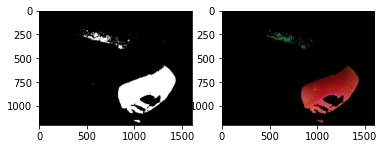

In [13]:
#@title Values ​​for a Light Red
light_red11 = 0 #@param {type:"slider", min:0, max:255, step:1}
light_red12 = 150 #@param {type:"slider", min:1, max:255, step:1}
light_red13 = 88 #@param {type:"slider", min:1, max:255, step:1}

#@title Values ​​for a Dark Red
dark_red21 = 255 #@param {type:"slider", min:1, max:255, step:1}
dark_red22 = 255 #@param {type:"slider", min:1, max:255, step:1}
dark_red23 = 255 #@param {type:"slider", min:1, max:255, step:1}

tomatoes = cv2.cvtColor(three, cv2.COLOR_RGB2HSV)
light_red = (light_red11, light_red12, light_red13)
dark_red = (dark_red21, dark_red22, dark_red23)
mask31 = cv2.inRange(tomatoes, light_red, dark_red)
result = cv2.bitwise_and(three, three, mask=mask31)
plt.subplot(1, 2, 1)
plt.imshow(mask31, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

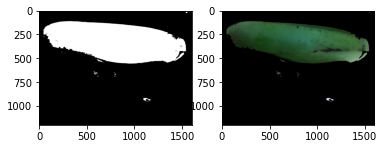

In [14]:
#@title Values ​​for a Light Green
light_green11 = 51 #@param {type:"slider", min:1, max:255, step:1}
light_green12 = 32 #@param {type:"slider", min:1, max:255, step:1}
light_green13 = 19 #@param {type:"slider", min:1, max:255, step:1}

#@title Values ​​for a Dark Green
dark_green21 = 132 #@param {type:"slider", min:1, max:255, step:1}
dark_green22 = 255 #@param {type:"slider", min:1, max:255, step:1}
dark_green23 = 255 #@param {type:"slider", min:1, max:255, step:1}

banana = cv2.cvtColor(three, cv2.COLOR_RGB2HSV)
light_green = (light_green11, light_green12, light_green13)
dark_green = (dark_green21, dark_green22, dark_green23)
mask32 = cv2.inRange(banana, light_green, dark_green)
result = cv2.bitwise_and(three, three, mask=mask32)
plt.subplot(1, 2, 1)
plt.imshow(mask32, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

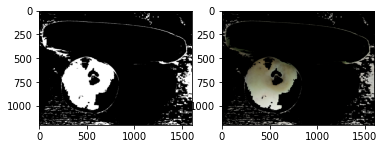

In [16]:
#@title Values ​​for a Light Yellow
light_yelow11 = 21 #@param {type:"slider", min:0, max:255, step:1}
light_yelow12 = 0 #@param {type:"slider", min:0, max:255, step:1}
light_yelow13 = 42 #@param {type:"slider", min:1, max:255, step:1}

#@title Values ​​for a Dark Yellow
dark_yelow21 = 44 #@param {type:"slider", min:1, max:255, step:1}
dark_yelow22 = 255 #@param {type:"slider", min:1, max:255, step:1}
dark_yelow23 = 255 #@param {type:"slider", min:1, max:255, step:1}

peach = cv2.cvtColor(three, cv2.COLOR_RGB2HSV)
light_yelow = (light_yelow11, light_yelow12, light_yelow13)
dark_yelow = (dark_yelow21, dark_yelow22, dark_yelow23)
mask33 = cv2.inRange(peach, light_yelow, dark_yelow)
result = cv2.bitwise_and(three, three, mask=mask33)
plt.subplot(1, 2, 1)
plt.imshow(mask33, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

# **Change of Textures One**

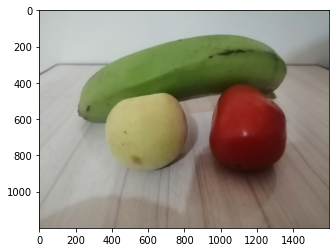

In [17]:

ret,thresh2 = cv.threshold(mask11,127,255,cv.THRESH_BINARY_INV)
plt.imshow(one ,cmap="gray")
plt.show()

In [18]:
background_image = mpimg.imread('onefruts.jpeg')
background_image = background_image[0:1200, 0:1600, 0:3]
masked_image2 = np.copy(background_image)
masked_image2[thresh2 == 0] = [0, 0, 0]

In [19]:
background_image = mpimg.imread('gh2.jpg')
background_image = background_image[0:1200, 0:1600]
masked_image3 = np.copy(background_image)
masked_image3[mask11 == 0] = [0, 0, 0]
complete_image = masked_image2 + masked_image3

In [20]:
masked_imagea = np.copy(complete_image)
banana1 = cv2.cvtColor(masked_imagea, cv2.COLOR_RGB2HSV)
light_green = (38, 68, 42)
dark_green = (57, 255, 255)
maska = cv2.inRange(banana1, light_green, dark_green)
result = cv2.bitwise_and(masked_imagea, three, mask=maska)
ret,thresh3 = cv.threshold(maska,127,255,cv.THRESH_BINARY_INV)

In [21]:
background_image1 = np.copy(complete_image)
background_image1 = background_image1[0:1200, 0:1600, 0:3]
masked_image2 = np.copy(background_image1)
masked_image2[thresh3 == 0] = [0, 0, 0]

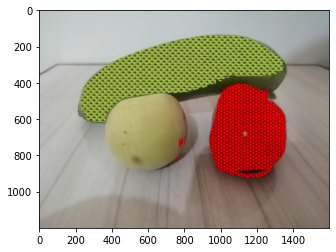

In [22]:
background_image11 = mpimg.imread('gh4.jpg')
background_image11 = background_image11[0:1200, 0:1600]
masked_image4 = np.copy(background_image11)
masked_image4[maska == 0] = [0, 0, 0]
complete_image1 = masked_image2 + masked_image4
plt.imshow(complete_image1)

# **Change of Textures Two**

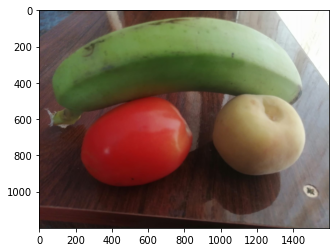

In [23]:
ret,thresh4 = cv.threshold(mask21,127,255,cv.THRESH_BINARY_INV)
plt.imshow(two ,cmap="gray")
plt.show()

In [24]:
background_image21 = mpimg.imread('twofruts.jpeg')
background_image21 = background_image21[0:1200, 0:1600, 0:3]
masked_imageb = np.copy(background_image21)
masked_imageb[thresh4 == 0] = [0, 0, 0]

In [25]:
background_image22 = mpimg.imread('gh2.jpg')
background_image22 = background_image22[0:1200, 0:1600]
masked_imagec = np.copy(background_image22)
masked_imagec[mask21 == 0] = [0, 0, 0]
complete_image2 = masked_imageb + masked_imagec

In [26]:
masked_imaged = np.copy(complete_image2)
banana2 = cv2.cvtColor(masked_imaged, cv2.COLOR_RGB2HSV)
light_green = (25, 32, 19)
dark_green = (132, 255, 255)
maske = cv2.inRange(banana2, light_green, dark_green)
result3 = cv2.bitwise_and(masked_imaged, two, mask=maske)
ret,thresh5 = cv.threshold(maske,127,255,cv.THRESH_BINARY_INV)

In [27]:
background_image23 = np.copy(complete_image2)
background_image23 = background_image23[0:1200, 0:1600, 0:3]
masked_imagef = np.copy(background_image23)
masked_imagef[thresh5 == 0] = [0, 0, 0]

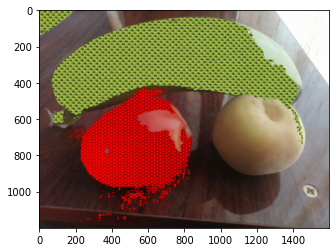

In [28]:
background_image24 = mpimg.imread('gh4.jpg')
background_image24 = background_image24[0:1200, 0:1600]
masked_imageg = np.copy(background_image24)
masked_imageg[maske == 0] = [0, 0, 0]
complete_image3 = masked_imageg + masked_imagef
plt.imshow(complete_image3)